In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
uploaded = files.upload()


Saving coin_gecko_2022-03-17.csv to coin_gecko_2022-03-17.csv
Saving coin_gecko_2022-03-16.csv to coin_gecko_2022-03-16.csv


In [5]:
import pandas as pd

# For March 16 file
df = pd.read_csv('/content/coin_gecko_2022-03-16.csv')

# OR for March 17 file
# df = pd.read_csv('/content/coin_gecko_2022-03-17.csv')

# Display the top rows
display(df.head())

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [6]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [7]:
df.isnull().sum()  # Identify missing values
df = df.dropna()  # or fillna with appropriate values


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df_scaled = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=['float64', 'int64']).columns)


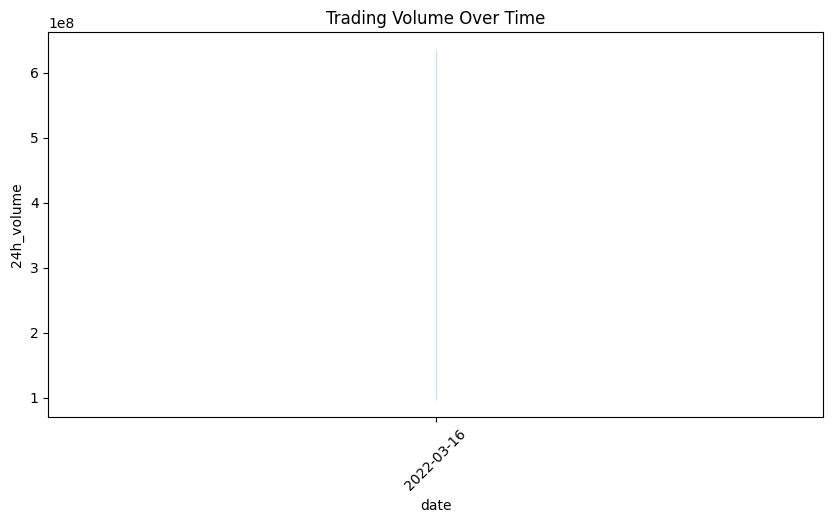

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price vs Volume
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='date', y='24h_volume')
plt.title('Trading Volume Over Time')
plt.xticks(rotation=45)
plt.show()

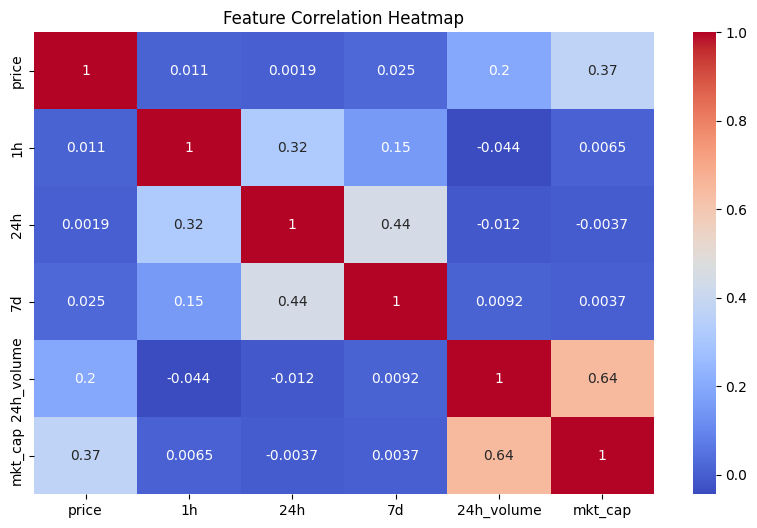

In [12]:
plt.figure(figsize=(10,6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
# Feature engineering: Moving average, volatility, liquidity ratio
df['price_ma_7'] = df['price'].rolling(window=7).mean()
df['price_volatility'] = df['price'].rolling(window=7).std()
df['liquidity_ratio'] = df['24h_volume'] / (df['mkt_cap'] + 1e-9)  # prevent division by zero
df.dropna(inplace=True)

#  Add this to show output
display(df.head())

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,price_ma_7,price_volatility,liquidity_ratio
12,Dogecoin,DOGE,0.115660,0.015,0.023,-0.011,451839687.0,1.531226e+10,2022-03-16,38.471403,42.341433,0.029508
13,TerraUSD,UST,1.000000,-0.001,0.003,0.001,742209053.0,1.502546e+10,2022-03-16,25.827117,37.498452,0.049397
14,Shiba Inu,SHIB,0.000022,0.024,0.028,-0.021,546344871.0,1.218610e+10,2022-03-16,13.597120,27.333860,0.044833
15,Wrapped Bitcoin,WBTC,40820.440000,0.020,0.030,0.055,443045583.0,1.107764e+10,2022-03-16,5844.970812,15422.755437,0.039995
16,Cronos,CRO,0.401575,0.018,0.043,0.038,99233479.0,1.010857e+10,2022-03-16,5842.378180,15423.899608,0.009817


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Example features
features = ['price_ma_7', 'price_volatility', 'liquidity_ratio']
target = 'liquidity_ratio'  # or define your own target

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np # Import numpy

y_pred = model.predict(X_test)

# Calculate RMSE by taking the square root of the MSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 2.1453853950299078e-16
MAE: 1.1465608045940645e-16
R² Score: 1.0


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': None, 'n_estimators': 100}


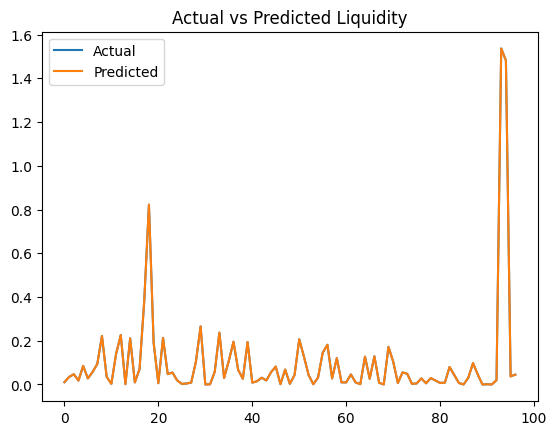

In [21]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Liquidity")
plt.show()


In [24]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [26]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [29]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [30]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>